In [2]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
res = joblib.load("./functions/results/results.pkl")
new_res = {}
for k, v in res.items():
    k_3 = k[3].replace("<class '", "").replace("'>", "").replace("torch.", "").replace("numpy.", "")
    key = (k[0], k[1], k[2], k_3, k[4])
    new_res[key] = v

df = pd.DataFrame.from_dict(new_res)
df.index = ["mean", "sem"]
df = df.T
df.index = df.index.set_names(["function", "implementation", "device", "dtype", "jitted"])
df

mean  \
function          implementation device dtype                 jitted             
bandpass_biquad   torchaudio     cpu    float32               0       0.317865   
                                                              1       0.222693   
                                        float64               0       0.163253   
                                                              1       0.158519   
phase vocoder     torchaudio     cpu    (complex64, float32)  0       0.146664   
                                                              1       0.143526   
                                        (complex128, float64) 0       0.264075   
                                                              1       0.238163   
                                 cuda:0 (complex64, float32)  0       0.003715   
                                                              1       0.003140   
                                        (complex128, float64) 0       0.003718   
                                                              1       0.003054   
                  librosa        cpu    complex64             0       1.218697   
                                        complex128            0       1.812838   
griffinlim        torchaudio     cpu    float32               0       1.869192   
                                                              1       2.015343   
                                        float64               0       3.063008   
                                                              1       2.965700   
                                 cuda:0 float32               0       0.041678   
                                                              1       0.040012   
                                        float64               0       0.063874   
                                                              1       0.062464   
                  librosa        cpu    float32               0       2.313560   
                                        float64               0       2.859256   
mfcc              torchaudio     cpu    float32               0       0.540443   
                                                              1       0.526253   
                                        float64               0       0.484375   
                                                              1       0.465859   
                                 cuda:0 float32               0       0.033629   
                                                              1       0.026154   
                                        float64               0       0.031912   
                                                              1       0.024701   
                  librosa        cpu    float32               0       0.518254   
                                        float64               0       0.639764   
spectral centroid torchaudio     cpu    float32               0       0.072073   
                                                              1       0.080543   
                                        float64               0       0.100263   
                                                              1       0.095610   
                                 cuda:0 float32               0       0.012912   
                                                              1       0.010767   
                                        float64               0       0.013018   
                                                              1       0.010895   
                  librosa        cpu    float32               0       0.347679   
                                        float64               0       0.370432   
spectrogram       torchaudio     cpu    float32               0       0.104205   
                                                              1       0.118820   
                                        float64               0       0.291058   
                                                        

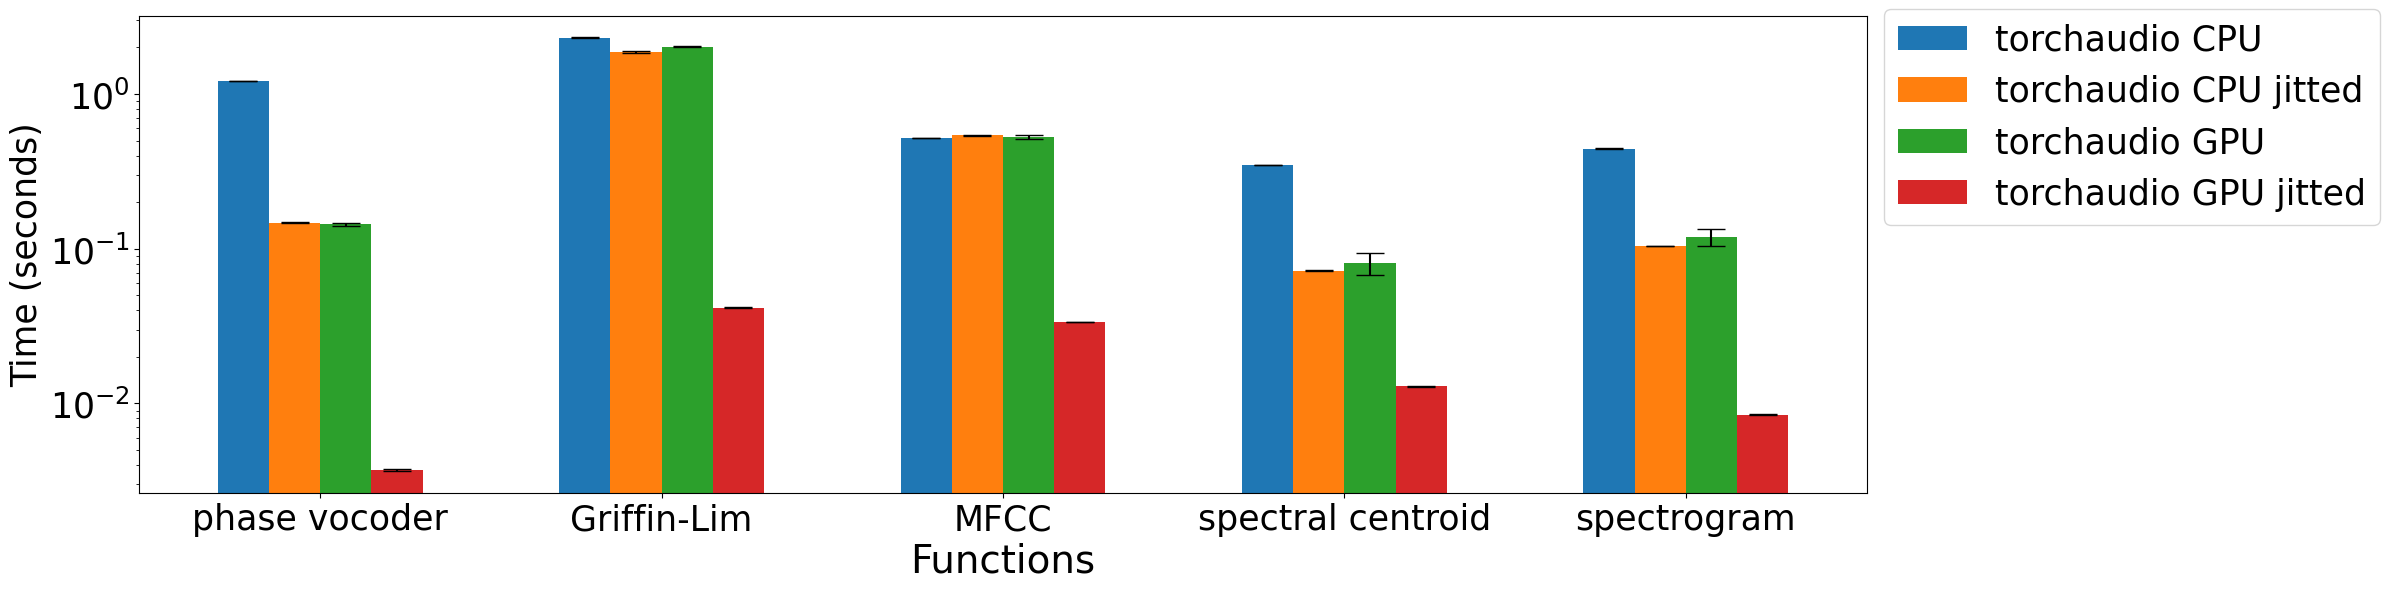

In [4]:
res = joblib.load("./functions/results/results.pkl")


functions = ["phase vocoder", "Griffin-Lim", "MFCC", "spectral centroid", "spectrogram"]
keys = {
    "phase vocoder": [
        ["phase vocoder", "librosa", "cpu", "<class 'numpy.complex64'>", 0],
        ["phase vocoder", "torchaudio", "cpu", "(torch.complex64, torch.float32)", 0],
        ["phase vocoder", "torchaudio", "cpu", "(torch.complex64, torch.float32)", 1],
        ["phase vocoder", "torchaudio", "cuda:0", "(torch.complex64, torch.float32)", 0],
        ["phase vocoder", "torchaudio", "cuda:0", "(torch.complex64, torch.float32)", 1],
    ],
    "griffinlim": [
        ["griffinlim", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["griffinlim", "torchaudio", "cpu", "torch.float32", 0],
        ["griffinlim", "torchaudio", "cpu", "torch.float32", 1],
        ["griffinlim", "torchaudio", "cuda:0", "torch.float32", 0],
        ["griffinlim", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
    "mfcc": [
        ["mfcc", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["mfcc", "torchaudio", "cpu", "torch.float32", 0],
        ["mfcc", "torchaudio", "cpu", "torch.float32", 1],
        ["mfcc", "torchaudio", "cuda:0", "torch.float32", 0],
        ["mfcc", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
    "spectral centroid": [
        ["spectral centroid", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["spectral centroid", "torchaudio", "cpu", "torch.float32", 0],
        ["spectral centroid", "torchaudio", "cpu", "torch.float32", 1],
        ["spectral centroid", "torchaudio", "cuda:0", "torch.float32", 0],
        ["spectral centroid", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
    "spectrogram": [
        ["spectrogram", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["spectrogram", "torchaudio", "cpu", "torch.float32", 0],
        ["spectrogram", "torchaudio", "cpu", "torch.float32", 1],
        ["spectrogram", "torchaudio", "cuda:0", "torch.float32", 0],
        ["spectrogram", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
}

names = [
    "librosa CPU",
    "torchaudio CPU",
    "torchaudio CPU jitted",
    "torchaudio GPU",
    "torchaudio GPU jitted",
]

fig, ax = plt.subplots(figsize=(24, 5))
fn_width = 0.15
width = 0.15
fontsize = 25

for i in range(len(names)):
    means, sems = [], []
    for k, v in keys.items():
        means.append(res[tuple(v[i])][0])
        sems.append(res[tuple(v[i])][1])

    x = np.arange(len(keys))
    rects = ax.bar(x - (len(names)*width)/2 + ((i + 0.5) * fn_width),
                   means, yerr=sems, width=width, label=names[i],
                   lw=10, capsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time (seconds)', fontsize=fontsize)
    ax.set_xlabel('Functions', fontsize=fontsize+3)
    ax.set_xticks(x)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_xticklabels(functions)
    ax.set_yscale('log')
    ax.legend(fontsize=fontsize, bbox_to_anchor=(1.0, 1.05))

    #ax.bar_label(rects, padding=3)

plt.tight_layout()
plt.savefig("./figs/function_bench.png")
plt.show()

In [24]:
res.keys()

dict_keys([('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float32', 0), ('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float32', 1), ('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float64', 0), ('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float64', 1), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex64, torch.float32)', 0), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex64, torch.float32)', 1), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex128, torch.float64)', 0), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex128, torch.float64)', 1), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex64, torch.float32)', 0), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex64, torch.float32)', 1), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex128, torch.float64)', 0), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex128, torch.float64)', 1), ('phase vocoder', 'librosa', 'cuda:0', "<class 'numpy.complex64'>", 0), ('phase vocoder', 'li

In [19]:
print(df.to_latex(float_format="%.3f", multirow=True))

\begin{tabular}{lllllrr}
\toprule
            &         &        &         &   &  mean &   sem \\
function & implementation & device & dtype & jitted &       &       \\
\midrule
\multirow{4}{*}{bandpass\_biquad} & \multirow{4}{*}{torchaudio} & \multirow{4}{*}{cpu} & \multirow{2}{*}{float32} & 0 & 0.374 & 0.007 \\
            &         &        &         & 1 & 0.222 & 0.004 \\
\cline{4-7}
            &         &        & \multirow{2}{*}{float64} & 0 & 0.143 & 0.001 \\
            &         &        &         & 1 & 0.138 & 0.001 \\
\cline{1-7}
\cline{2-7}
\cline{3-7}
\cline{4-7}
\multirow{10}{*}{phase vocoder} & \multirow{8}{*}{torchaudio} & \multirow{4}{*}{cpu} & \multirow{2}{*}{(complex64, float32)} & 0 & 0.137 & 0.003 \\
            &         &        &         & 1 & 0.142 & 0.003 \\
\cline{4-7}
            &         &        & \multirow{2}{*}{(complex128, float64)} & 0 & 0.256 & 0.005 \\
            &         &        &         & 1 & 0.233 & 0.000 \\
\cline{3-7}
\cline{4-7}
         

# Memory

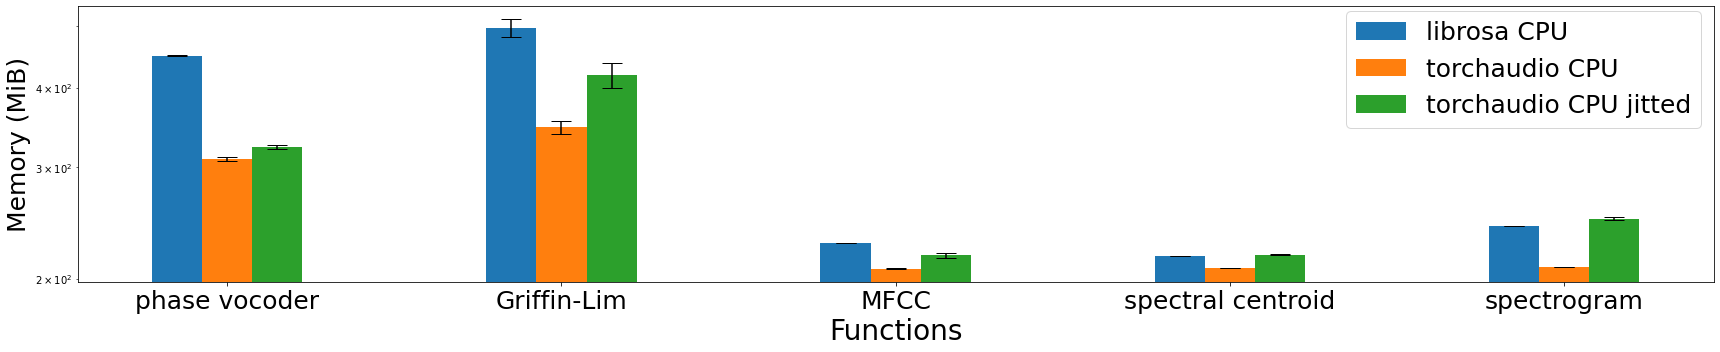

In [30]:
res = joblib.load("./functions/memory/results/results.pkl")

functions = ["phase vocoder", "Griffin-Lim", "MFCC", "spectral centroid", "spectrogram"]
keys = {
    "phase vocoder": [
        ["phase vocoder", "librosa", "cpu", "<class 'numpy.complex64'>", 0],
        ["phase vocoder", "torchaudio", "cpu", "(torch.complex64, torch.float32)", 0],
        ["phase vocoder", "torchaudio", "cpu", "(torch.complex64, torch.float32)", 1],
        #["phase vocoder", "torchaudio", "cuda:0", "(torch.complex64, torch.float32)", 0],
        #["phase vocoder", "torchaudio", "cuda:0", "(torch.complex64, torch.float32)", 1],
    ],
    "griffinlim": [
        ["griffinlim", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["griffinlim", "torchaudio", "cpu", "torch.float32", 0],
        ["griffinlim", "torchaudio", "cpu", "torch.float32", 1],
        #["griffinlim", "torchaudio", "cuda:0", "torch.float32", 0],
        #["griffinlim", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
    "mfcc": [
        ["mfcc", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["mfcc", "torchaudio", "cpu", "torch.float32", 0],
        ["mfcc", "torchaudio", "cpu", "torch.float32", 1],
        #["mfcc", "torchaudio", "cuda:0", "torch.float32", 0],
        #["mfcc", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
    "spectral centroid": [
        ["spectral centroid", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["spectral centroid", "torchaudio", "cpu", "torch.float32", 0],
        ["spectral centroid", "torchaudio", "cpu", "torch.float32", 1],
        #["spectral centroid", "torchaudio", "cuda:0", "torch.float32", 0],
        #["spectral centroid", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
    "spectrogram": [
        ["spectrogram", "librosa", "cpu", "<class 'numpy.float32'>", 0],
        ["spectrogram", "torchaudio", "cpu", "torch.float32", 0],
        ["spectrogram", "torchaudio", "cpu", "torch.float32", 1],
        #["spectrogram", "torchaudio", "cuda:0", "torch.float32", 0],
        #["spectrogram", "torchaudio", "cuda:0", "torch.float32", 1],
    ],
}

names = [
    "librosa CPU",
    "torchaudio CPU",
    "torchaudio CPU jitted",
    #"torchaudio GPU",
    #"torchaudio GPU jitted",
]

fig, ax = plt.subplots(figsize=(24, 5))
fn_width = 0.15
width = 0.15
fontsize = 25

for i in range(len(names)):
    means, sems = [], []
    for k, v in keys.items():
        means.append(res[tuple(v[i])][0])
        sems.append(res[tuple(v[i])][1])

    x = np.arange(len(keys))
    rects = ax.bar(x - (len(names)*width)/2 + ((i + 0.5) * fn_width),
                   means, yerr=sems, width=width, label=names[i],
                   lw=10, capsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Memory (MiB)', fontsize=fontsize)
    ax.set_xlabel('Functions', fontsize=fontsize+3)
    ax.set_xticks(x)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_xticklabels(functions)
    ax.set_yscale('log')
    ax.legend(fontsize=fontsize, bbox_to_anchor=(1.0, 1.03))

    #ax.bar_label(rects, padding=3)

plt.tight_layout()
plt.savefig("./figs/function_memory_bench.png")
plt.show()

In [29]:
res = joblib.load("./functions/memory/results/results.pkl")
res[('mfcc', 'librosa', 'cpu', "<class 'numpy.float32'>", 0)] = res[('mfcc', 'librosa', 'cpu', "<class 'numpy.float32'>", 1)]
del res[('mfcc', 'librosa', 'cpu', "<class 'numpy.float32'>", 1)]
res[('spectral centroid', 'librosa', 'cpu', "<class 'numpy.float32'>", 0)] = res[('spectral centroid', 'librosa', 'cpu', "<class 'numpy.float32'>", 1)]
del res[('spectral centroid', 'librosa', 'cpu', "<class 'numpy.float32'>", 1)]
res[('spectrogram', 'librosa', 'cpu', "<class 'numpy.float32'>", 0)] = res[('spectrogram', 'librosa', 'cpu', "<class 'numpy.float32'>", 1)]
del res[('spectrogram', 'librosa', 'cpu', "<class 'numpy.float32'>", 1)]
joblib.dump(res, "./functions/memory/results/results.pkl")

['./functions/memory/results/results.pkl']